In [2]:
import pandas as pd 
df=pd.read_csv("C:/Users/91932/Downloads/ml-basics-master/data/daily-bike-share.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
df['Date']=pd.DatetimeIndex(df['dteday']).day

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,Date
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [6]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
df[numeric_features + ['rentals']].describe()


,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [7]:
x=df[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values

In [8]:
y=df['rentals'].values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# linear regression 
lr=LinearRegression()
lr.fit(x_train,y_train)
x_pred=lr.predict(x_test)


In [13]:
print("the leanear regression result:{0},r2_score is:{1}".format(mean_squared_error(x_pred,y_test),r2_score(x_pred,y_test)*100))

the leanear regression result:170734.75123927285,r2_score is:41.27356221132693


Lasso() 

MSE: 170734.75123927285
RMSE: 413.20061863370057
R2: 0.6350718438796195


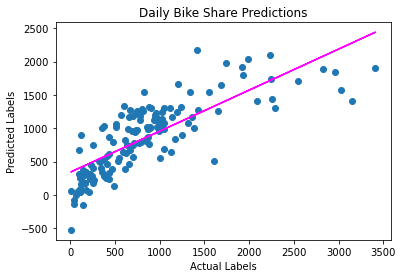

In [14]:
#lass
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(x_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, x_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, x_pred)
print("R2:", r2)


# Plot predicted vs actual
plt.scatter(y_test, x_pred,)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [15]:


# Train the model
model = DecisionTreeRegressor().fit(x_train, y_train)

# Visualize the model tree


In [16]:
dt_pred=model.predict(x_test)
print("mean_sqaured_error:{0}.r2_score:{1}".format(mean_squared_error(dt_pred,y_test),r2_score(dt_pred,y_test)))

mean_sqaured_error:147323.10884353743.r2_score:0.616574101450567


RandomForestRegressor() 

MSE: 108109.78577482994
RMSE: 328.80052581288544
R2: 0.7689263345920223


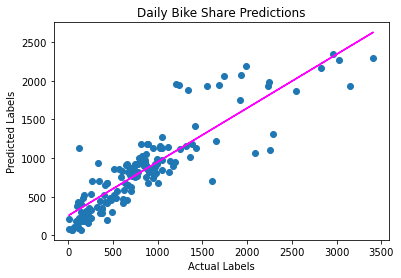

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(x_train, y_train)
print (model, "\n")


# Evaluate the model using the test data
rf_pred = model.predict(x_test)
mse = mean_squared_error(y_test, rf_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, rf_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, rf_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 105745.89750741153
RMSE: 325.18594297326496
R2: 0.7739789052048711


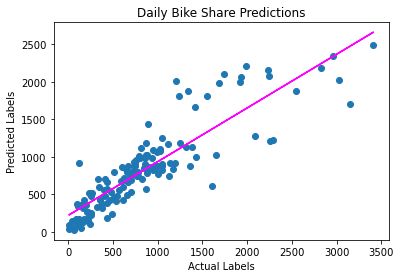

In [18]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(x_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
gb_pred = model.predict(x_test)
mse = mean_squared_error(y_test, gb_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, gb_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, gb_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
models=PolynomialFeatures()

In [21]:
model.fit(x_train,y_train)
pf_pred=model.predict(x_test)
print("mean_squared_error:{0},r2_score:{1}".format(mean_squared_error(y_test,pf_pred),r2_score(y_test,pf_pred)))

mean_squared_error:107712.68390220332,r2_score:0.7697750994340813


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 



In [23]:
params={
    'degree':[1,5,10]
}

In [24]:
gr=GridSearchCV(models,params,scoring=score,cv=3,return_train_score=True)



In [25]:
gr.fit(x_train,y_train)


C:\Users\91932\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91932\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\91932\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\91932\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\91932\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

  warnings.warn(
C:\Users\91932\anaconda

GridSearchCV(cv=3, estimator=PolynomialFeatures(),
             param_grid={'degree': [1, 5, 10]}, return_train_score=True,
             scoring=make_scorer(r2_score))

In [26]:
print("best parameters:",gr.best_params_,'\n')

best parameters: {'degree': 1} 



In [27]:
#classification 

di_data=pd.read_csv("C:/Users/91932/Downloads/ml-basics-master/data/diabetes.csv")


In [28]:
di_data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [29]:
x=di_data.iloc[:,:9]
y=di_data['Diabetic']

In [30]:
from matplotlib import pyplot as plt


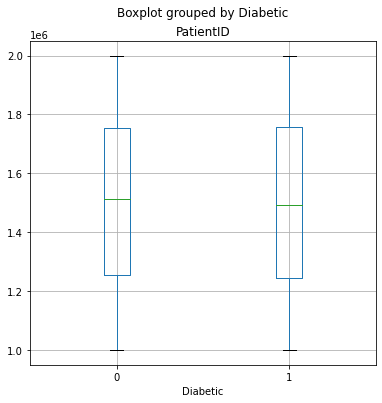

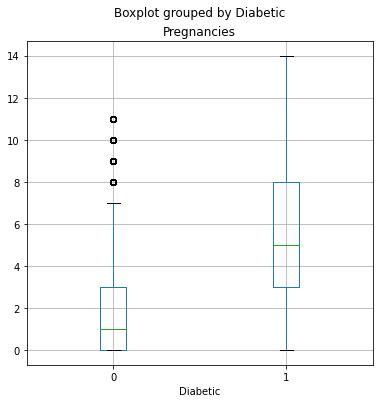

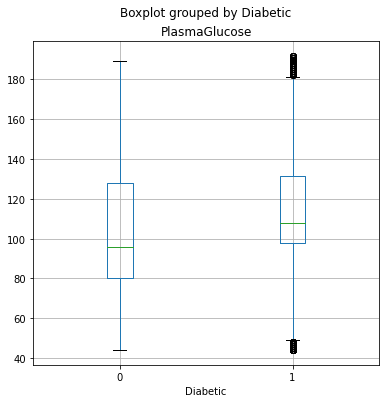

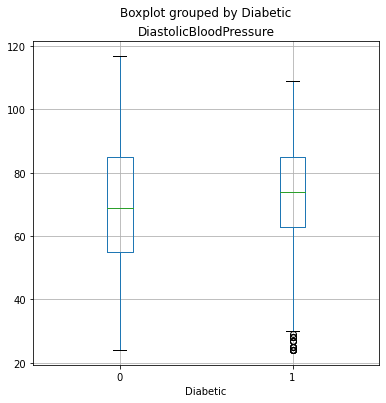

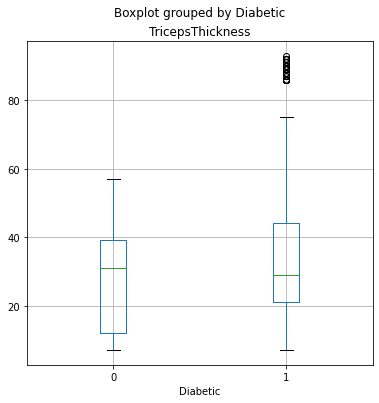

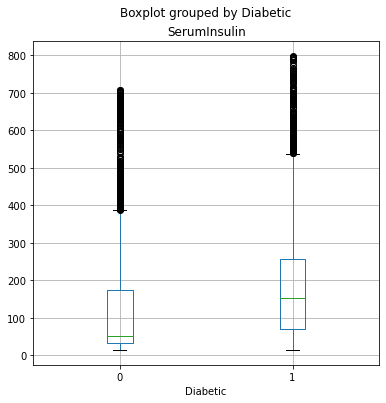

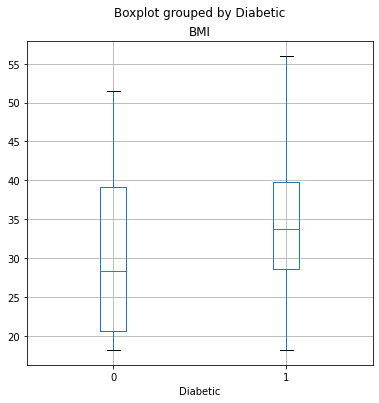

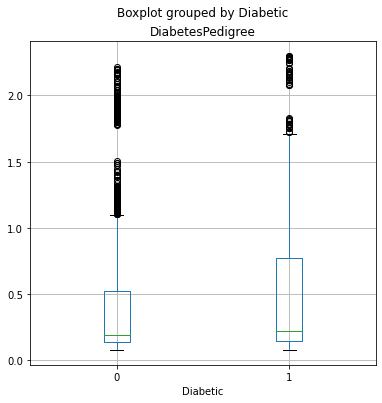

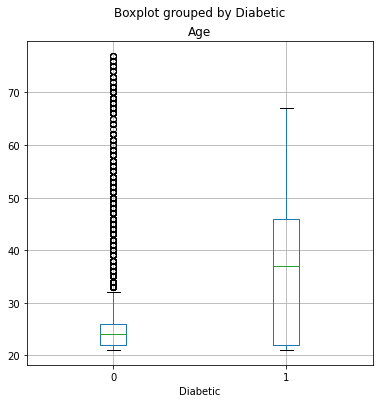

In [31]:
for col in x:
    di_data.boxplot(column=col,by='Diabetic',figsize=(6,6))
    plt.title(col)
plt.show() 

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
params={
    "solver":['liblinear','newton-cg','lbfgs','sag','saga']
}
from sklearn.linear_model import LogisticRegression 
LR=LogisticRegression()

In [34]:
grt=GridSearchCV(LR,params,scoring=score,cv=3,return_train_score=True)

In [35]:
grt.fit(x_train,y_train)

C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             return_train_score=True, scoring=make_scorer(r2_score))

In [36]:
print(grt.best_params_)

{'solver': 'newton-cg'}


In [37]:
lr=LogisticRegression(solver='newton-cg')

In [38]:
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)


C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91932\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [39]:
from sklearn.metrics import classification_report ,confusion_matrix

In [40]:
print("classification report:",classification_report(y_test,lr_pred))

classification report:               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1980
           1       0.72      0.58      0.65      1020

    accuracy                           0.78      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.78      0.78      0.78      3000



In [41]:
from sklearn.metrics import roc_curve

In [42]:
y_scores=lr.predict_proba(x_test)

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_scores[:,1])

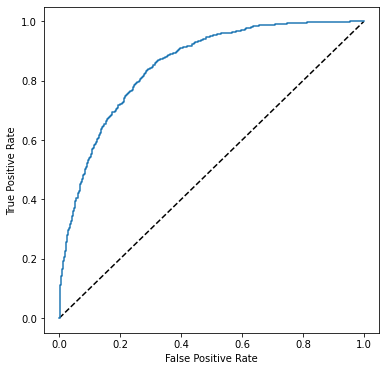

In [44]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8532451970687264


In [46]:
#build pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


In [47]:
di_data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [48]:
di_data['Age'].unique()

array([21, 23, 43, 22, 26, 53, 38, 25, 45, 42, 41, 33, 24, 55, 47, 34, 46,
       75, 59, 54, 32, 31, 44, 60, 50, 49, 73, 35, 37, 61, 68, 29, 51, 39,
       52, 40, 30, 71, 56, 66, 28, 58, 67, 57, 36, 62, 69, 70, 65, 48, 64,
       77, 63, 72, 74, 76], dtype=int64)

In [49]:
num_fet=[0,1,2,3,4,5,6]
num_1=Pipeline(steps=[('scaler',StandardScaler())])

In [50]:
cat_fet=[7]
cat_1=Pipeline(steps=[('one hot',OneHotEncoder())])
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 5711 to 3914
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               12000 non-null  int64  
 1   Pregnancies             12000 non-null  int64  
 2   PlasmaGlucose           12000 non-null  int64  
 3   DiastolicBloodPressure  12000 non-null  int64  
 4   TricepsThickness        12000 non-null  int64  
 5   SerumInsulin            12000 non-null  int64  
 6   BMI                     12000 non-null  float64
 7   DiabetesPedigree        12000 non-null  float64
 8   Age                     12000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 937.5 KB


In [51]:
processor=ColumnTransformer(transformers=[('num to standard scaler',num_1,num_fet),('cat to one hot',cat_1,cat_fet)])

In [52]:
pipeline=Pipeline(steps=[('data process',processor),('model building',RandomForestClassifier())])

In [53]:
model=pipeline.fit(x_train,(y_train))
print(model
     )

Pipeline(steps=[('data process',
                 ColumnTransformer(transformers=[('num to standard scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat to one hot',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder())]),
                                                  [7])])),
                ('model building', RandomForestClassifier())])


In [54]:

# Combine preprocessing steps
preprocessors = ColumnTransformer(
    transformers=[
        ('num',StandardScaler() , [0,1,2,3,4,5,6]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [7])])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessors),
                           ('logregressor', RandomForestClassifier())])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(x_train, (y_train))
print (model)
pipeline.get_params()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    [0, 1, 2, 3, 4, 5, 6]),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    [7])])),
  ('logregressor', RandomForestClassifier())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  [0, 1, 2, 3, 4, 5, 6]),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  [7])]),
 'logregressor': RandomForestClassifier(),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'drop',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('num',
   StandardScaler(),
   [0, 1, 2, 3, 4, 5, 6]),
  ('cat', OneHotEncoder(handle_unknown='ignore'), [7])],
 'preprocessor__verbose': False,
 'preprocess

In [55]:
lt_pred=model.predict(x_test)


In [56]:
print('classifiaction report',classification_report(y_test,lt_pred))

classifiaction report               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1980
           1       0.92      0.85      0.88      1020

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000



In [57]:
r_score=model.predict_proba(x_test)

In [58]:
fpr,tpr,thresholds=roc_curve(y_test,r_score[:,1])

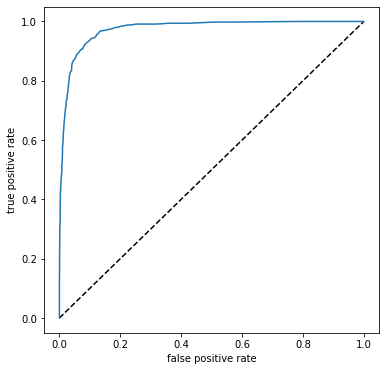

In [59]:
fi=plt.figure(figsize=(6,6,))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [60]:
# so here i save my model for future use

import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [61]:
predj=joblib.load('./diabetes_model.pkl')

In [62]:
predj

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])

In [63]:
#clustering 

seed=pd.read_csv("C:/Users/91932/Downloads/ml-basics-master/data/seeds.csv")

In [64]:
seed.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [66]:
scaled_data=MinMaxScaler().fit_transform(seed.iloc[:,0:6])

In [67]:
scaled_data

array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , 0.18975225, 0.42908054,
        0.98166664],
       [0.11803588, 0.16528926, 0.39927405, 0.15540541, 0.14682823,
        0.36834441],
       [0.16147309, 0.19214876, 0.54718693, 0.19369369, 0.24518888,
        0.63346292]])

In [68]:
pca=PCA(n_components=2).fit_transform(scaled_data)

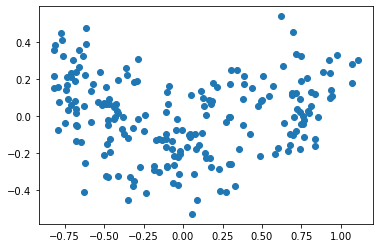

In [69]:
plt.scatter(pca[:,0],pca[:,1])


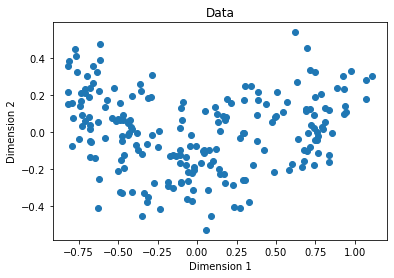

In [70]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(pca[:,0],pca[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()
seeds=seed.iloc[:,0:6]

In [71]:
from sklearn.cluster import KMeans
wcss=[]

In [73]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(pca)
    wcss.append(km.inertia_)
    
    


C:\Users\91932\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

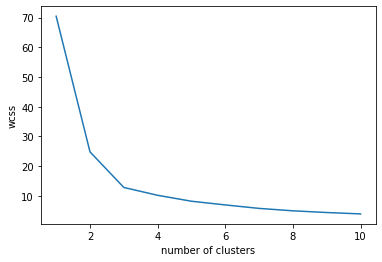

In [74]:
plt.plot(range(1,11),wcss)    
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [82]:
mod=KMeans(n_clusters=3)
mod.fit(pca)


KMeans(n_clusters=3)

In [76]:
seeds['cluster']=pred

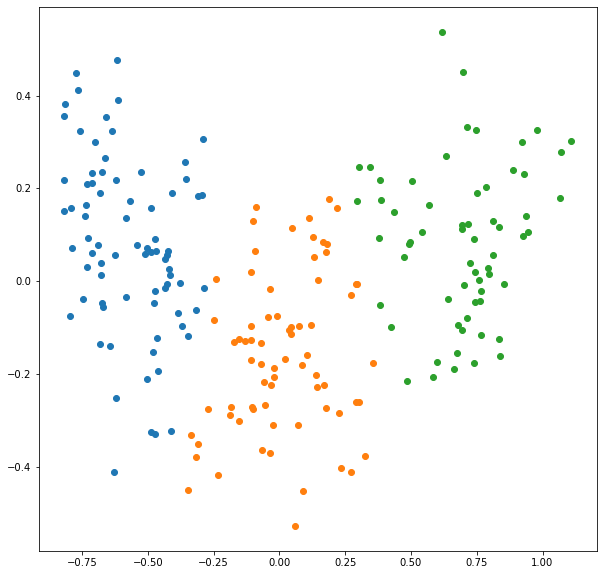

In [83]:
label=mod.predict(pca)
plt.figure(figsize=(10,10))
unique=np.unique(label)


for i in unique:
    plt.scatter(pca[label==i,0],pca[label==i,1],label=i)

In [85]:
seed['label']=label

In [86]:
seed

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,1
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,0


In [89]:
# deep neural network using tensorflow 

peng=pd.read_csv('Downloads/ml-basics-master/data/penguins.csv')

In [90]:
peng.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [98]:
peng.isnull().sum()


CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [100]:
peng.dropna(inplace=True)

In [101]:
peng.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [107]:
peng_fet=peng.iloc[:,0:4]
peng_label=peng.iloc[:,4]

In [108]:
peng_label

0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [159]:
x_train,x_test,y_train,y_test=train_test_split(peng_fet.values,peng_label.values,test_size=0.3)


In [160]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense 
from tensorflow.keras import utils 
from tensorflow.keras import optimizers

In [161]:
model=Sequential()

In [175]:
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


In [181]:
model.add(Dense(20,activation='relu',input_shape=(4,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [182]:
lerning_rate=0.001
re=optimizers.Adam(lr=lerning_rate)

In [183]:
model.compile(loss='categorical_crossentropy',optimizer=re,metrics=['accuracy'])

In [187]:
num_epochs=50

history=model.fit(x_train,y_train,batch_size=10,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0540 - accuracy: 0.4268 - val_loss: 1.0430 - val_accuracy: 0.4757
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0538 - accuracy: 0.4268 - val_loss: 1.0429 - val_accuracy: 0.4757
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0539 - accuracy: 0.4268 - val_loss: 1.0430 - val_accuracy: 0.4757
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.4268 - val_loss: 1.0427 - val_accuracy: 0.4757
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.4268 - val_loss: 1.0430 - val_accuracy: 0.4757
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0545 - accuracy: 0.4268 - val_loss: 1.0427 - val_accuracy: 0.4757
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0539 - accuracy: 0.4268 - val_loss: 1.0427 - val_accuracy: 0.4757
Epoch 8/50
24/24 [==

Text(0, 0.5, 'loss')

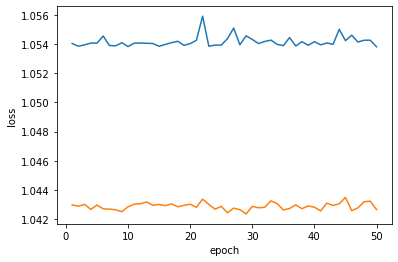

In [191]:
epoch_num=range(1,50+1)
loss_score=history.history['loss']
val_score=history.history['val_loss']
plt.plot(epoch_num,loss_score)
plt.plot(epoch_num,val_score)
plt.xlabel('epoch')
plt.ylabel('loss')

In [195]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
penguin_classes=['Adelie', 'Gentoo', 'Chinstrap']

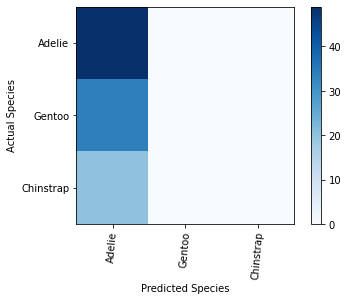

In [196]:
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [5]:
datas='Downloads/ml-basics-master/data/shapes'
import os



In [5]:
classes = os.listdir(datas)
classes.sort()

In [6]:
print(len(classes), 'classes:')
print(classes)

3 classes:
['circle', 'square', 'triangle']


In [7]:
cwd=os.getcwd()

In [23]:
image_path=os.path.join(cwd,datas)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [11]:
image_path

'C:\\Users\\91932\\Downloads/ml-basics-master/data/shapes'

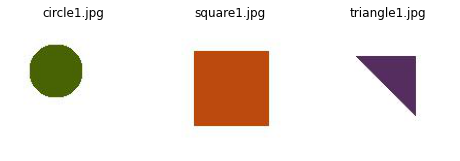

In [24]:
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(datas):
    i+=1
    img_file = os.listdir(os.path.join(datas,sub_dir))[0]
    img_path = os.path.join(datas, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#prepare data
print('training datagenerate')
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.3)
img_size=(128,128)
batch_size=30

training datagenerate


In [9]:
#prepare training data
training_gen=datagen.flow_from_directory(datas,target_size=img_size,batch_size=batch_size,class_mode='categorical',subset='training')

#prepare validation dat
validation_gen=datagen.flow_from_directory(datas,target_size=img_size,batch_size=batch_size,class_mode='categorical',subset='validation')

Found 840 images belonging to 3 classes.
Found 360 images belonging to 3 classes.


In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,Dense
training_gen.num_classes
training_gen.image_shape

3

In [24]:
model=Sequential()

model.add(Conv2D(32,(6,6),input_shape=training_gen.image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(6,6),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(6,6),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(training_gen.num_classes,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [34]:
history=model.fit(training_gen,steps_per_epoch=training_gen.samples//batch_size,
                 validation_data=validation_gen,validation_steps=validation_gen.samples//batch_size,epochs=5)

Epoch 1/5
28/28 [==============================] - 44s 1s/step - loss: 0.7852 - accuracy: 0.6107 - val_loss: 0.4670 - val_accuracy: 0.6917
Epoch 2/5
28/28 [==============================] - 32s 1s/step - loss: 0.2896 - accuracy: 0.8536 - val_loss: 0.1412 - val_accuracy: 0.9361
Epoch 3/5
28/28 [==============================] - 30s 1s/step - loss: 0.0493 - accuracy: 0.9905 - val_loss: 0.0114 - val_accuracy: 0.9972
Epoch 4/5
28/28 [==============================] - 30s 1s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/5
28/28 [==============================] - 30s 1s/step - loss: 0.0088 - accuracy: 0.9964 - val_loss: 0.0092 - val_accuracy: 0.9944


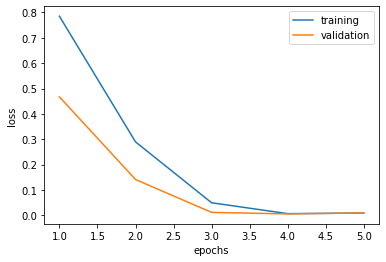

In [39]:
# check accuracy
from matplotlib import pyplot as plt
num_epochs=range(1,5+1)
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
plt.plot(num_epochs,training_loss)
plt.plot(num_epochs,validation_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')

plt.show()


Generating predictions from validation data...


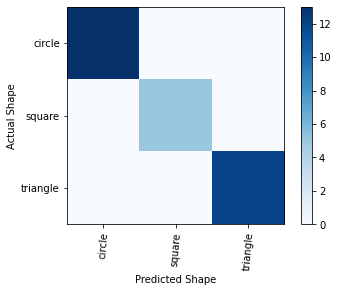

In [45]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_gen[0][0]
y_test = validation_gen[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)
classnames = list(training_gen.class_indices.keys())

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()